In [2]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
print("Done")

Done


In [37]:
#Load Dataset
dataset = pd.read_csv('./leuanalysisNew.csv')
dataset.head()

,CELL,SMEAR,INFIL,LI,BLAST,TEMP,REMISS
0,0.8,0.83,0.66,1.9,1.10,1.00,1
1,0.9,0.36,0.32,1.4,0.74,0.99,1
2,0.8,0.88,0.70,0.8,0.18,0.98,0
3,1.0,0.87,0.87,0.7,1.05,0.99,0
4,0.9,0.75,0.68,1.3,0.52,0.98,1


In [5]:
#Create x (we ignore the y variable)
x = dataset.drop('REMISS', axis=1).to_numpy()

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_transformed=sc.fit_transform(x)
print("Done")

Done


C:\Users\ramse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


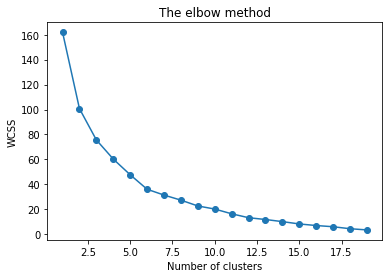

In [30]:
#Determine optimum number of clusters
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
    kmeans.fit(data_transformed)
    wcss.append(kmeans.inertia_)
    
#Plot Elbow Method
plt.plot(range(1, 20), wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()  

For n_clusters= 2, The Silhouette Coefficient is 0.22972085065748718
For n_clusters= 3, The Silhouette Coefficient is 0.1743850640966066
For n_clusters= 4, The Silhouette Coefficient is 0.20631955740350025
For n_clusters= 5, The Silhouette Coefficient is 0.26748741305184426
For n_clusters= 6, The Silhouette Coefficient is 0.2444019584193471
For n_clusters= 7, The Silhouette Coefficient is 0.23627558946692012
For n_clusters= 8, The Silhouette Coefficient is 0.2272406719820449
For n_clusters= 9, The Silhouette Coefficient is 0.1853266323255806
For n_clusters= 10, The Silhouette Coefficient is 0.2403569271185103
For n_clusters= 11, The Silhouette Coefficient is 0.18328050043747915
For n_clusters= 12, The Silhouette Coefficient is 0.18965350676714612
For n_clusters= 13, The Silhouette Coefficient is 0.13279505996868887
For n_clusters= 14, The Silhouette Coefficient is 0.18611515275369636
For n_clusters= 15, The Silhouette Coefficient is 0.07811142361920087
For n_clusters= 16, The Silhouett

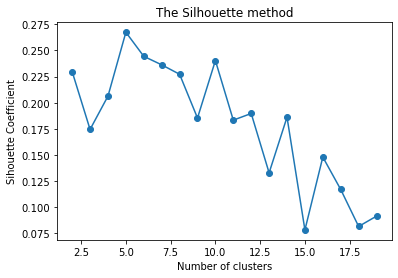

In [42]:
#Create Silhouette Coefficients
scores= []
for n_cluster in range(2, 20):
       kmeans = KMeans(n_clusters=n_cluster).fit(x)
       label = kmeans.labels_
       sil_coeff = silhouette_score(data_transformed, label, metric='euclidean')
       scores.append(sil_coeff) 
       print('For n_clusters= {}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

#Plot Silhouette
plt.plot(range(2,20), scores, marker='o')
plt.title('The Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Sihouette Coefficient') 
plt.show()        

In [39]:
#Create KMeans with 2 Clusters

#Apply KMeans clustering
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_kmeans = kmeans.fit_predict(data_transformed)

#Add Prediction column to dataset
dataset2= dataset.drop('REMISS', axis=1)
dataset2['New Cluster']=kmeans.labels_
dataset2['New Cluster'] = dataset2['New Cluster'].map({0:'Cluster 1', 1:'Cluster 2',2:'Cluster 3',3:'Cluster 4',4:'Cluster 5'}) 
dataset2.head()

,CELL,SMEAR,INFIL,LI,BLAST,TEMP,New Cluster
0,0.8,0.83,0.66,1.9,1.10,1.00,Cluster 3
1,0.9,0.36,0.32,1.4,0.74,0.99,Cluster 2
2,0.8,0.88,0.70,0.8,0.18,0.98,Cluster 2
3,1.0,0.87,0.87,0.7,1.05,0.99,Cluster 5
4,0.9,0.75,0.68,1.3,0.52,0.98,Cluster 2


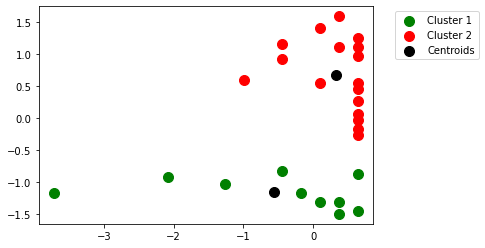

In [27]:
#Apply KMeans clustering
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_kmeans = kmeans.fit_predict(data_transformed)

#Plot of 2 Clusters
plt.scatter(data_transformed[y_kmeans == 0, 0], data_transformed[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(data_transformed[y_kmeans == 1, 0], data_transformed[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

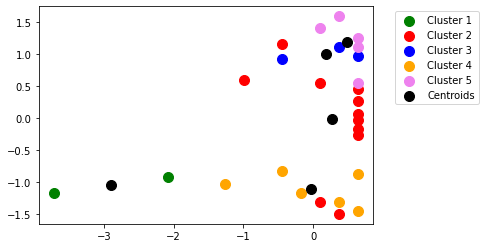

In [28]:
#Apply KMeans clustering
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_kmeans = kmeans.fit_predict(data_transformed)

#Plot of 5 Clusters
plt.scatter(data_transformed[y_kmeans == 0, 0], data_transformed[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(data_transformed[y_kmeans == 1, 0], data_transformed[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(data_transformed[y_kmeans == 2, 0], data_transformed[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(data_transformed[y_kmeans == 3, 0], data_transformed[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(data_transformed[y_kmeans == 4, 0], data_transformed[y_kmeans == 4, 1], s = 100, c = 'violet', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)